basit regresyon 

temel amaç:bagımlı ve bagımsız degişken arasındaki ilişkiyi ifade eden dogrusal fonksiyon bulmaktır 

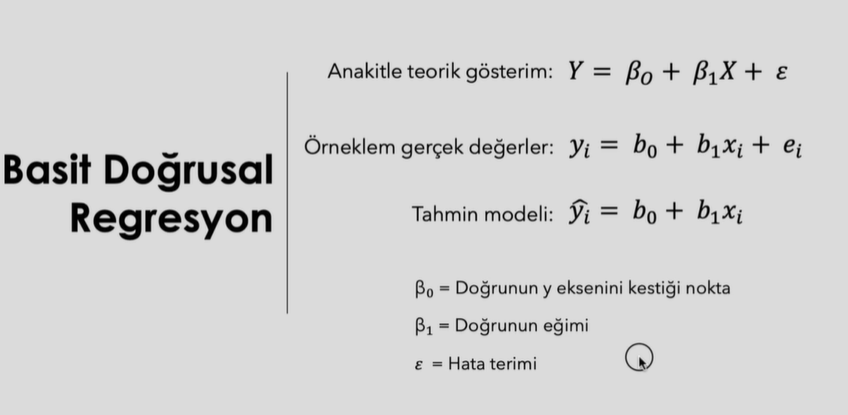

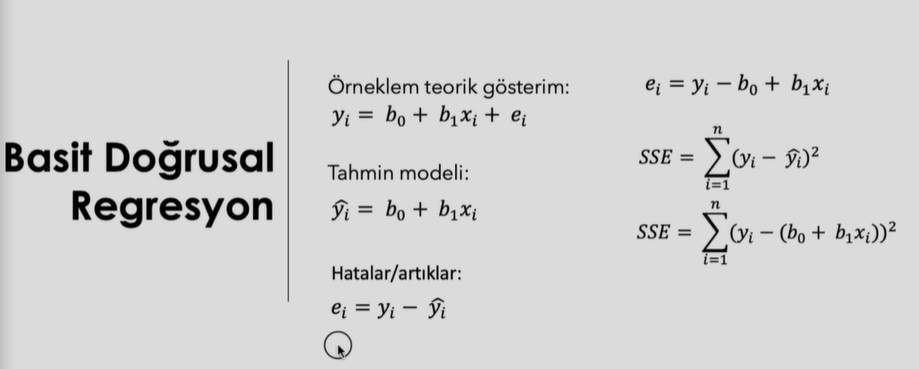

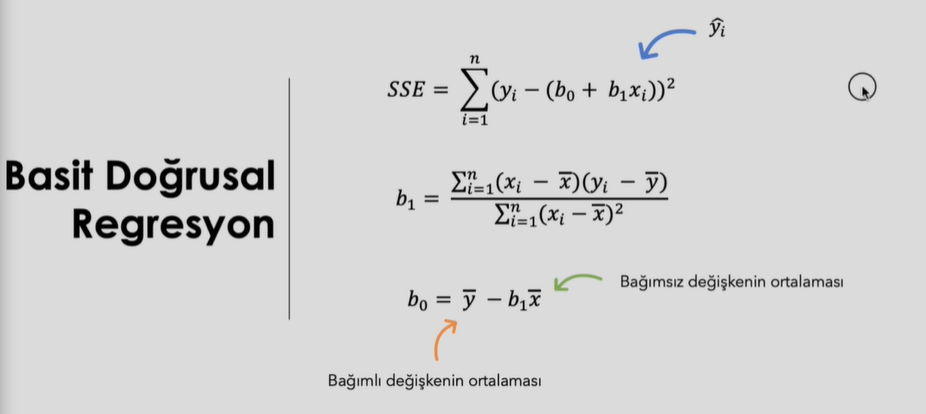

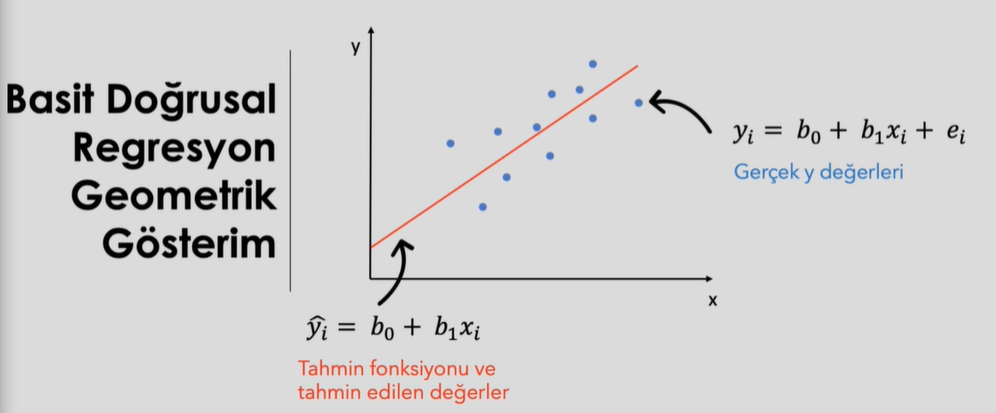

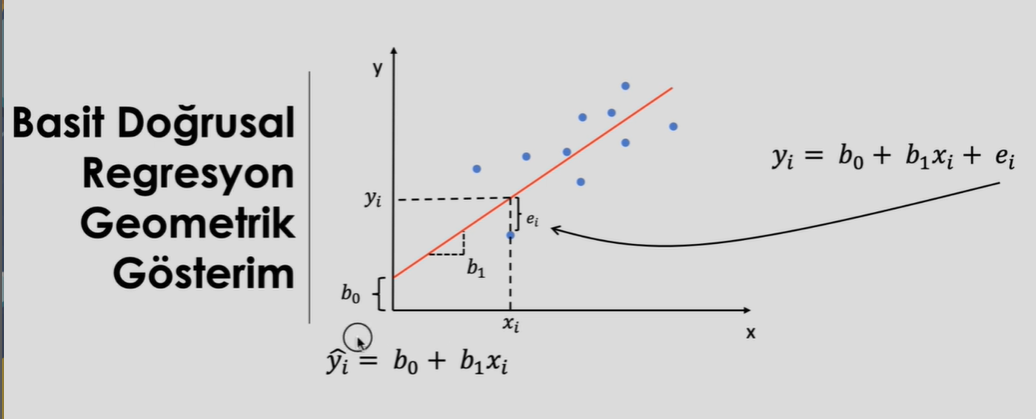

## kitap önerisi

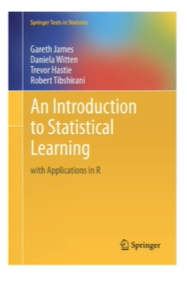

# Basit Dogrusal Regresyon


In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
#df=df.iloc[:,1:len(df)]
#df.head()  yukarıdaki 1,2,3,4 yerine yazım şekli bu dur tablodaki sol üst kısımdaki okumayı kaldırır

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
df.isnull().values.any()#hicbir eksik gözlem cıkmadı

False

In [10]:
df.corr()#degişeknlerin dagılımını ve korelasyonuna bakalım 

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


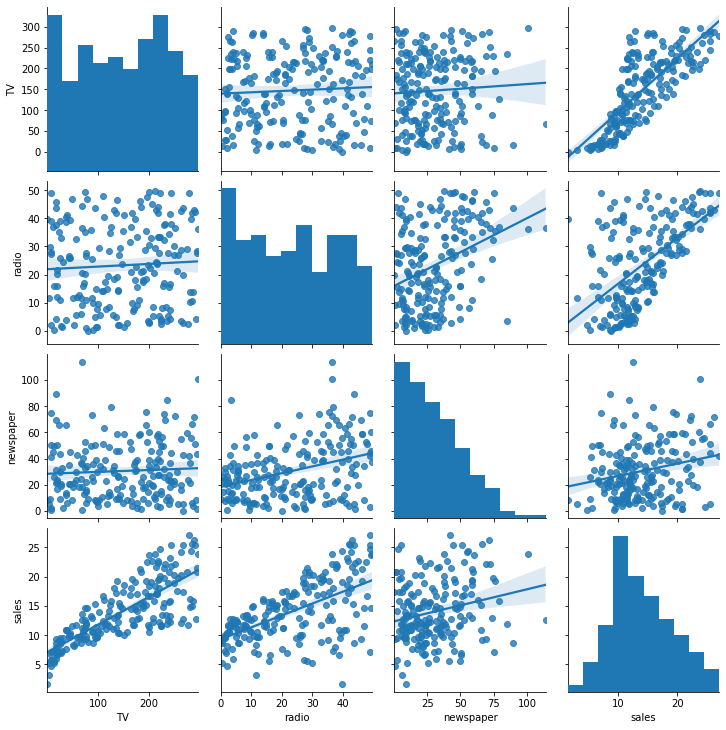

In [11]:
import seaborn as sns
sns.pairplot(df,kind="reg");

egim şiddeti ifade eder,aşagı yönlü dönmemsi negatif yönlü bir ilişki oldugunu ifade eder 

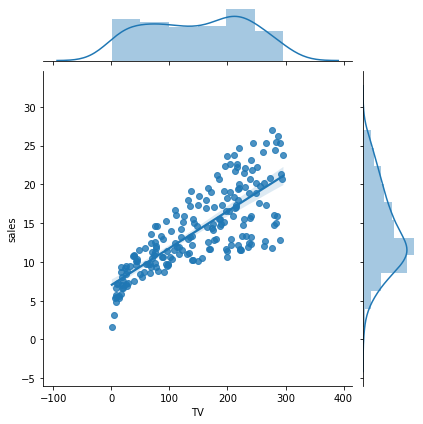

In [12]:
sns.jointplot(x ="TV", y = "sales", data = df, kind = "reg")

# Statsmodels İle Modelleme

In [13]:
import statsmodels.api as sm
X=df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [14]:
X=sm.add_constant(X)#matris işlemi yapabilmek için matrise bir eklemesi yaptık 
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [15]:
y=df["sales"]

In [16]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [17]:
lm= sm.OLS(y,X)#lm =>linner model demek burada ,model kurma yaptık burada 

In [18]:
model=lm.fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           1.47e-42
Time:                        17:08:29   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## yukarıdaki modelin yorumlamasını iyi yapmak lazım 
R-squared:=> açıklanabilirlik oranıdır,arttıgında iyi bir yolda oldugumuzu düşünebiliriz durumu yanıltıcı bir durumdur

Adj.R-squared=>duyarlılıgı daha az olan bir metriktir ve veri eklensede r-squared'i törpülemeye devam eder,bizim için daha iyi bir degerdir 

F-statistic=>modelin anlamlılıgının anlaşılabilmesi için kurulan test istatisitigidir,bu model anlamlılmı sorunsunun cevabını alabiliriz burada 

Prob (F-statistic)=>prob bazı yerlerde significant diye de gecebiliyor,p-value degerinin kendisidir 

AIC ve BIC=> model karşılaştırma için kurulmuş sistemlerdir 

No. Observations=>gözlem sayısı

Df Residuals=>serbestlik sayısı verilmiş

[0.025	0.975]=>güven aralıgı

In [20]:
import statsmodels.formula.api as smf
lm=smf.ols("sales~TV", df)
model=lm.fit()
model.summary()

#bu yazım yukardakinin faeklı bir versiyonu 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           1.47e-42
Time:                        17:08:29   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model.params#model parameterelerini verir

Intercept    7.032594
TV           0.047537
dtype: float64

In [22]:
model.summary().tables[1]#katsayı detaylarına erişmek istersek 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [23]:
model.conf_int()#katsayıların güven aralıklarına erişmek istersek 

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [24]:
model.f_pvalue #modelin anlamlılgına dair istatistiklere erişmek istersek

1.4673897001947095e-42

In [25]:
print("f_pvalue:","%.4f"%model.f_pvalue)#p value degerini virgülden sonra 4 basamak şeklinde verdi bize 

f_pvalue: 0.0000


In [26]:
print("fvalue: ","%.2f"% model.fvalue)#f istatisigine erişmek istersek 

fvalue:  312.14


In [27]:
print("tvalue: ","%.2f"% model.tvalues[0:1])#paramtere anlalmlıgına ilişkin degerlere erişmek istersek 

tvalue:  15.36


In [28]:
model.mse_model #hata kareler ortalamasına erişmek istersek 

3314.6181668686486

In [29]:
model.rsquared#r kare degeri

0.611875050850071

In [30]:
model.rsquared_adj#düzeltilmiş r kare degeri

0.6099148238341623

In [31]:
model.fittedvalues[0:5]#bunlar tahmin edilen degerler 

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [32]:
y[0:5]#gerçek degerler 

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [33]:
print("Sales="+str("%.2f"%model.params[0])+"+TV"+"*"+str("%.2f" % model.params[1]))

Sales=7.03+TV*0.05


bukarıdaki degerler tv harcamalarına bu kadar bütce ayırabiliyoruz ne kadar satış yapabiliriz

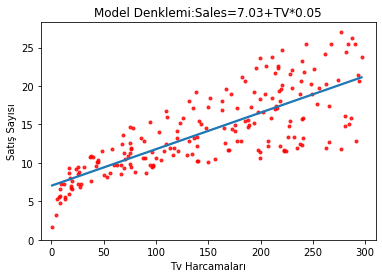

In [34]:
g=sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi:Sales=7.03+TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("Tv Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [35]:
from sklearn.linear_model import LinearRegression

In [40]:
X=df[["TV"]]
y=df["sales"]
reg=LinearRegression()
model=reg.fit(X,y)
#print(dir(model))=model nesnesine ait kullanulabilir özelliklere bakmaya yarar 

model.intercept_
model.coef_


array([0.04753664])

In [184]:
model.score(X,y)

0.611875050850071

In [185]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Basit Dogrusal Regresyon-TAHMİN

Model Denklemi:Sales=7.03+TV*0.05
    
örnek:30 birim TV  harcaması oldugunda satışların tahmini degeri ne olur?  


In [186]:
7.03+30*0.04

8.23

In [193]:
import pandas as pd 
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [194]:
model.predict([[30]])#yukarıdaki 4 işlemli kısmı burada kod ile yapmaya çalıştık

array([8.45869276])

In [195]:
yeni_veri=[[5],[90],[200],[30]]#bunların herbirini verine katıp bize ardı ardına sonuç verecek

In [196]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164,  8.45869276])

## ARTIKLAR VE MAKİNE ÖGRENMESİNDEKİ ÖNEMİ

In [197]:
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.formula.api as smf

In [198]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [199]:
mse =mean_squared_error(y, model.fittedvalues)

In [200]:
mse

10.512652915656757

In [201]:
import numpy as np
rmse=np.sqrt(mse)

In [202]:
reg.predict(X)[0:10]#reg regresyon modeli,tahmin degerleri

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [203]:
y[0:10]#gercek degerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [204]:
k_t=pd.DataFrame({"gercek_y": y[0:10],
                 "tahmin_y":reg.predict(X)[0:10]})
#amaç burada artıkları ele almak 


In [205]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [206]:
k_t["hata"]=k_t["gercek_y"]-k_t["tahmin_y"]

In [207]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [208]:
k_t["hata_kare"]=k_t["hata"]**2#ortalama alıyoruz yönlülük olsa bile kaybolma olmasın diye karesini alıp ortalamasına bakıyoruz

In [209]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [211]:
np.sum(k_t["hata_kare"])#toplam yaptıgım hata 

92.90350329638103

In [212]:
np.mean(k_t["hata_kare"])#hata kareler ortalaması

9.290350329638105

In [214]:
np.sqrt(np.mean(k_t["hata_kare"]))#hata karelerin kareköküne erişiyoruz 

3.048007599996776

In [216]:
model.resid[0:10]#modelin artıkları biz bunları yukarıda elle hesaplma yaptık 

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

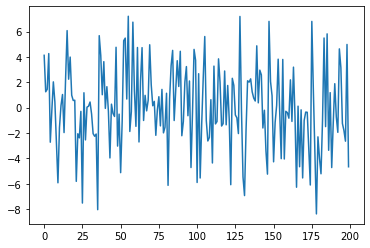

In [219]:
plt.plot(model.resid)#daha teknik bir detaydır,daha rahat bir inceleme yapmak için kullanırız 